#NOTEBOOK 3: Exploratory data analysis
In this notebook we will focus on exploratory data analysis, this means, analyzing data with multiple variables and finding possible correlations between them. First, we will use the visual methods that we presented on Notebook 2, such as histograms, boxplots, and violin plots, but for all of the variables in our wine dataset. Then, we will take an approach to finding a correlation between them using a heatmap. Lastly, we will present different algorithms used for variable reduction.

## Table of Contents
---
* [Visualization](#Visualization)
  * [Boxplot](##Boxplot)
  * [Violin Plot](##Violin_Plot)
* [Correlation analysis](#Correlation_analysis)
  * [Heatmap](##Heatmap)
  * [Pair Plot](##Pair_Plot)
* [Variable reduction](#Variable_reduction)
  * [PCA (Principal Components Analysis)](##PCA_(Principal_Components_Analysis))
  * [t-SNE (t-distributed Stochastic Neighbor Embedding)](##t-SNE_(t-distributed_Stochastic_Neighbor_Embedding))
  * [UMAP (Uniform Manifold Approximation and Projection)](##UMAP_(Uniform_Manifold_Approximation_and_Projection))
* [Advanced plots](#Advanced_plots)
  * [Interactive Plot with Widgets](##Interactive_Plot_with_Widgets)
  * [Interactive Plot with Plotly](##Interactive_Plot_with_Plotly)
  * [3D Plots with Matplotlib](##3D_Plots_with_Matplotlib)

# Visualization
---

Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. We will cover some basic techniques to undestand how the data behaves and this could help us to decide for example what methods employ.

First, as always, we have to import the data set.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.66     11.0        6

[1599 rows x 12 columns]

##Boxplot
We can make boxplots for every variable, this kind of plot allows us to look for outliers. Let's remember what a boxplot is: A boxplot is a one-dimensional plot, a simple one will show all the values in the dataset for a variable, specifying the minimun and maximun values on the borders, and the first, second (median), and third quartiles on the inside.
In seaborn, boxplots can be oriented vertically or horizontally using the paramenter "orient", by specifying its values "v" (for vertical), and "h" (for horizontal).

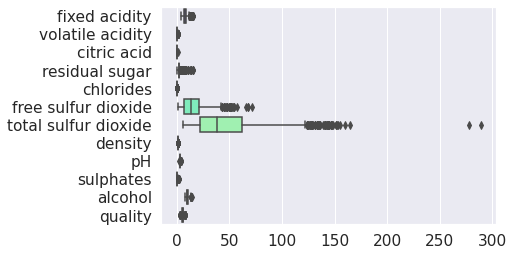

In [ ]:
ax = sns.boxplot(data=df, orient="h", palette="rainbow")


As you can see, the values ​​of the variables are on different scales. 
To better visualize it we apply logarithmic scale.

(0.0, 300.0, 11.5, -0.5)

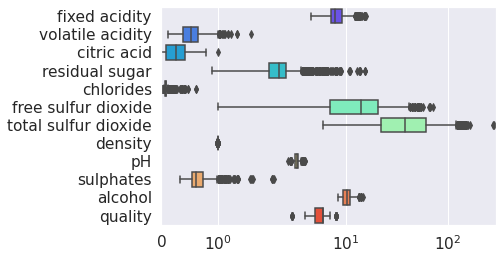

In [ ]:
ax = sns.boxplot(data=df, orient="h", palette="rainbow")
ax.set_xscale('symlog')
ax.axis(xmin=0, xmax=300)

As we can see, the means of the data vary great deal. This happens because the data is on different scales, meaning that different units are used to measure the different features It is possible to **scale the data**, which means centering the means of the data. A common method is to standardize variables by subtracting the column mean and dividing by the variance, thus making $\mu=0$ and $\sigma=1$ . Scikit-learn has a module for preprocessing and we will use it in the next example. For more information, please visit  [Scikit-learns's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 'Standard Scaler')

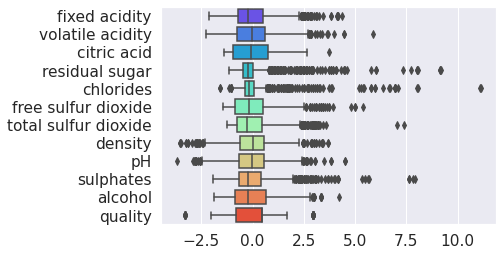

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(data=scaled, columns=df.columns)
ax = sns.boxplot(data=df_scaled, orient="h", palette="rainbow")

Another way to visualize the boxplots is in matrix form. In this case, we use a function of the Pandas library called plot().

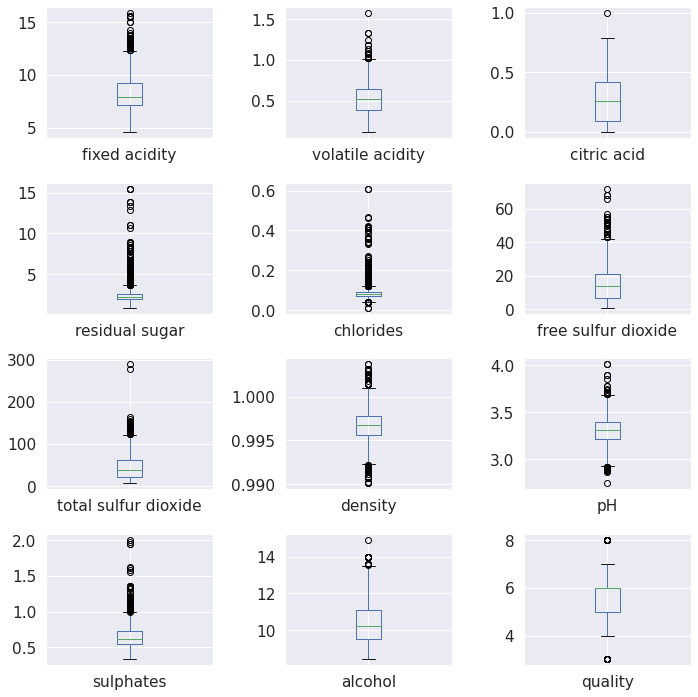

In [ ]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,10))
plt.tight_layout()

#Violin plot
Violin plots can be used to vizualize both the distribution of the data and the posible outliers in the same figure.

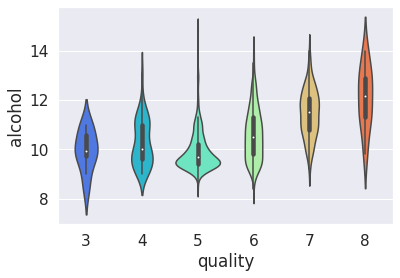

In [ ]:
sns.violinplot(x = 'quality', y = 'alcohol', data = df, palette="rainbow")

#Correlation analysis
---

Another important aspect to understand our data is to study the correlation between the variables.If we want to see the correlation between pH and fixed acidity, we can make this scatter plot and marginal histograms using `sns.jointplot`

Text(0.1, 0.9, '$\\rho = -0.683, p = 0.000$')

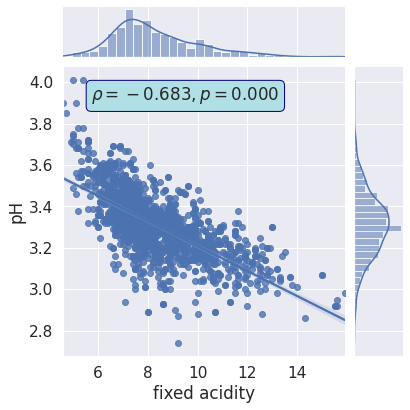

In [ ]:
import scipy.stats as stats
joint_plt = sns.jointplot(y='pH', x='fixed acidity', data=df, kind='reg',)

r, p = stats.pearsonr(df['fixed acidity'], df['pH'])
joint_plt.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})


At first glance, as the slope is not very steep, it can be inferred that the relation is not exactly linear and the correlation is low. So we can calculate the correlation between two variables with _Pearson correlation coefficient_ and the _p-value_.

The _Pearson correlation coefficient_ ($\rho$) allows us to easily observe linear dependencies between two data sets. A value of +1 means total positive linear correlation, 0 means no linear correlation, and −1, total negative linear correlation. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases y decreases.

The _p-value_ roughly indicates the probability that uncorrelated datasets have a _Pearson correlation coefficient_ at least as extreme as the determined for these datasets. If this probability is lower than the 5% (P<0.05), the correlation coefficient is statistically significant.

**Be careful as correlation does not imply causation. When two variables are correlated, there may or may not be a causative connection, and this connection may moreover be indirect.**

In [ ]:
from scipy.stats import pearsonr
def get_corr(col1, col2, temp_df):
    pearson_corr, p_value = pearsonr(temp_df[col1], temp_df[col2])
    print("Correlation between {} and {} is {:.2f}".format(col1, col2, pearson_corr))
    print("P-value of this correlation is {}".format(p_value))
get_corr('fixed acidity', 'pH', df)

Correlation between fixed acidity and pH is -0.68
P-value of this correlation is 4.063034039847446e-220


It makes sense that the fixed acidity has a negative correlation with the pH ( $\rho$ = -0.68 ) (we verified this by doing a scatterplot a few cells back). Although it's not completely linear, as we would expect from our chemistry knowledge.

##Heatmap

 We can create a DataFrame with this parameter for each pair of columns (using the _df.corr()_ function) and then, use matplot and seaborn to create a _heatmap_ of the coefficients.

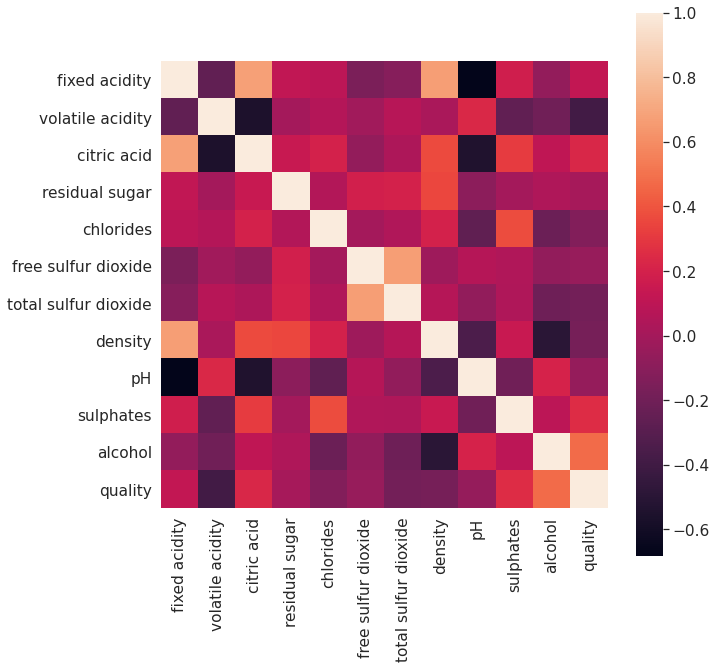

In [ ]:
# We calculate correlation with Pearson's coefficient using Pandas:
correlation = df.corr(method='pearson')
# We create a new figure using matplotlib and set the figure size:
fig=plt.gcf()
fig.set_size_inches(10,10)
# Heatmap of the correlation using Seaborn:
sns.heatmap(correlation, annot=False,square=True)

When several variables are compared at the same time it's difficult to grasp how the data behaves. So we could add to the heatmap the values of each comparison and plot only the lower triangular correlation matrix (since it's a symmetrical graph, and the information in the upper triangle is redundant).

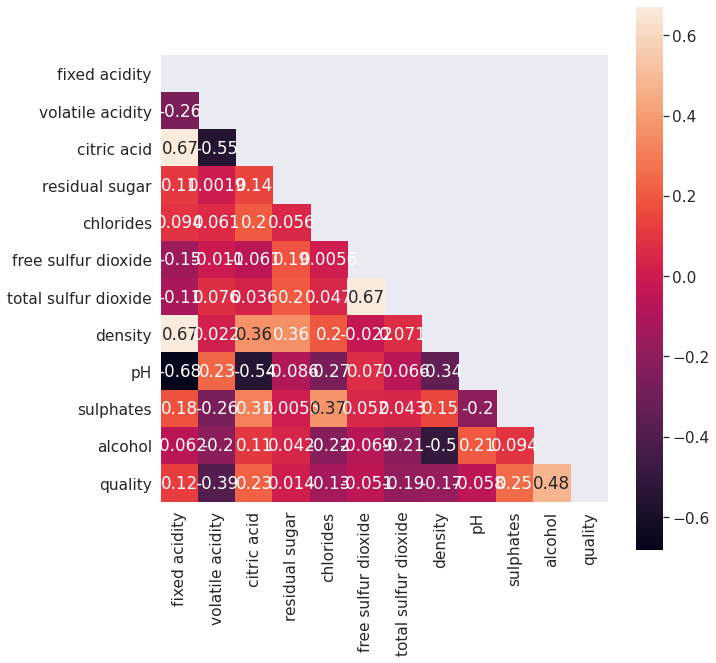

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
correlation = df.corr()
# np.triu is a numpy function that  takes 2d-numpy array as input and gives the upper triangle of the array
mask_triu = np.triu(correlation)
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask_triu,square=True,annot=True)

##Pair Plot

Another way to visualize the correlation between the
variables is to plot a correlation matrix with the _pairplot_ seaborn function. For example, here we plot the correlation of four columns of the dataset.

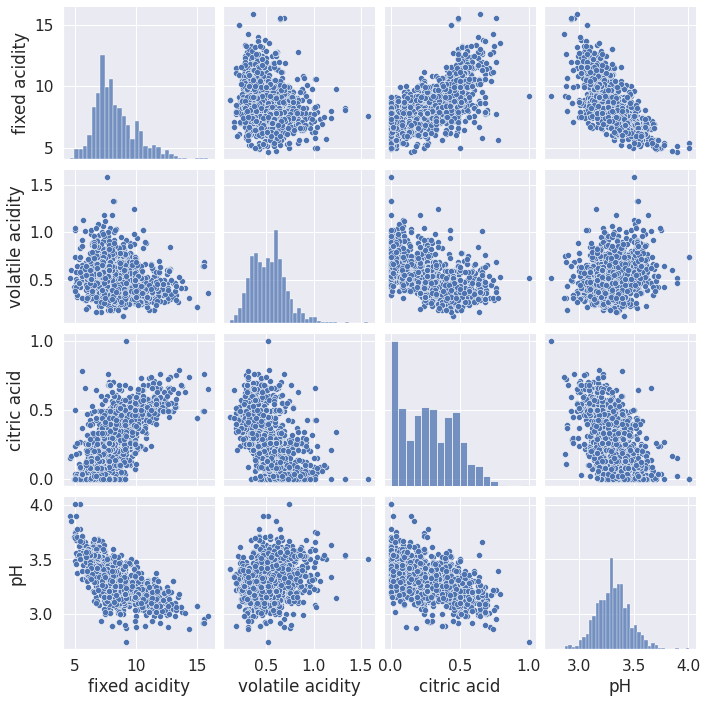

In [ ]:
sns.pairplot(df[['fixed acidity','volatile acidity','citric acid', 'pH']], corner=False) #corner=True hides the upper portion of the matrix

#Variable reduction
---


A very useful way to visualize data with multiple variables are the _variable reduction techniques_. Which reduces the multiple dimensions of the problem to just two or three, in order to make a plot that allows us to visualize the overall distribution of the variables.

We will concatenate the datasets of red and white wine for the Purposes of visualization.

In [ ]:
import pandas as pd
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df['hue']='red'
df2=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
df2['hue']='white'
df_wine = pd.concat([df, df2], ignore_index=True)

##PCA (Principal Components Analysis)
The PCA algorithm defines a NEW set of coordinates (components) from a large dataset with multiple variables, and transforms the values into the new coordinates. These coordinates are defined in order to maximize the variance by some scalar projection. The components are arranged according to their original variance, that's why this technique is useful for reducing the dimensions of a dataset.

After loading the dataset, we import the **Standard Scaler from sklearn.preprocessing** and **PCA function from sklearn.decomposition**. Scaling the data is important as not every variable has the same range. So, we create the PCA object and define the number of components. Using `StandardScaler()` and `fit_transform()`,  we can fit the new variables (components) and transform their values into the new variables. For more information visit the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html "sklearn.decomposition.PCA").

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data_pca = df_wine.copy()
data_pca = data_pca.drop(labels = ['quality', 'hue'],axis = 1)
#What StandardScaler() does is scaling the data. The fit.transform() module fits these new values to the data, 
#and stores them, replacing the old values.
data_pca = StandardScaler().fit_transform(data_pca)
#Apply PCA on the transformed (scaled and centered) data:
pca = PCA(n_components=3)
pca_results = pca.fit_transform(data_pca)

Now we'll use **seaborn** to make the PCA graph. In this graph, similar datapoints should be closer together, forming a cluster. For this dataset we'd like to see white wine and red wine forming two separate clusters.
(When making the scatterplot, the _hue_ parameter corresponds with the color of the dots.)

<Figure size 432x288 with 0 Axes>

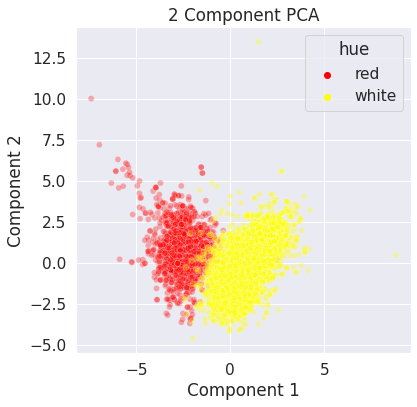

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
pca_dataset = pd.DataFrame(data = pca_results, columns = ['component1', 'component2','component3'] )
pca_dataset['hue']=df_wine['hue']
plt.figure()
plt.figure(figsize=(6,6))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
sns.scatterplot(x = pca_dataset['component1'], y = pca_dataset['component2'], hue=pca_dataset['hue'],
                alpha=0.3,palette=["red", "yellow"])

###t-SNE (t-distributed Stochastic Neighbor Embedding)

t-SNE is an algorithm that determines the similarity between pairs of points in a high dimensional space and replicates this similarity in a low dimensional space based on the probability distribution of the distances.

We can make this dimension reduction with the **scikit learn** module and then plot it with **seaborn**. First, we make a copy of the dataset, then, we drop the columns for _quality_ and _wine_ in this copy, we won't use them to make the t-SNE, but we'll take the _wine_ column into account for the plot, for the purpose of visualization.

To make the dimension reduction we have to create a t-SNE object and then use the `tsne.fit_transform` function on it with our dataset copy. For more information visit the [this section of sklearn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html "sklearn.manifold.TSNE").


In [ ]:
from sklearn.manifold import TSNE
data_tsne = df_wine.copy()
data_tsne = data_tsne.drop(labels = ['quality', 'hue'],axis = 1)
data_tsne = StandardScaler().fit_transform(data_tsne)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_tsne)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6497 samples in 0.016s...
[t-SNE] Computed neighbors for 6497 samples in 1.544s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6497
[t-SNE] Computed conditional probabilities for sample 2000 / 6497
[t-SNE] Computed conditional probabilities for sample 3000 / 6497
[t-SNE] Computed conditional probabilities for sample 4000 / 6497
[t-SNE] Computed conditional probabilities for sample 5000 / 6497
[t-SNE] Computed conditional probabilities for sample 6000 / 6497
[t-SNE] Computed conditional probabilities for sample 6497 / 6497
[t-SNE] Mean sigma: 0.733566
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.754196
[t-SNE] KL divergence after 300 iterations: 2.354388


Finally, we can create a DataFrame using the t-SNE results, add the _hue_ column and plot it with **seaborn**. 

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

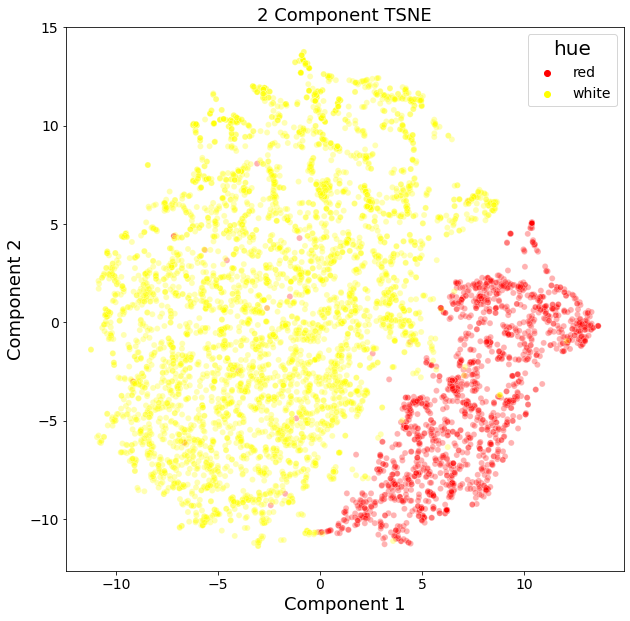

In [ ]:
tsne_dataset = pd.DataFrame(data = tsne_results, columns = ['component1', 'component2'] )
tsne_dataset['hue']=df_wine['hue']
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component TSNE')
plt.legend()
sns.scatterplot(x = tsne_dataset['component1'], y = tsne_dataset['component2'], hue=tsne_dataset['hue'],
                alpha=0.3, palette=["red", "yellow"])

##UMAP (Uniform Manifold Approximation and Projection)
UMAP is a new technique published in 2018 for dimension reduction. This is an alternative to t-SNE for visualization, that preserves more of the global structure with better run time performance. The data is modeled by a manifold with a fuzzy topological structure. The small representation (or embedding) is found by searching for a low dimensional projection of the data that has the closest possible equivalent fuzzy topological structure. For more information visit the [ UMAP documentation](https://umap-learn.readthedocs.io/en/latest/basic_usage.html "How to Use UMAP").

In [ ]:
import umap

data_umap = df_wine.copy()
data_umap = data_umap.drop(labels = ['quality', 'hue'],axis = 1)
scaled_data_umap = StandardScaler().fit_transform(data_umap) #We convert each feature into z-scores (number of standard deviations from the mean) for comparability.
umap = umap.UMAP()
umap_results = umap.fit_transform(scaled_data_umap)

<Figure size 432x288 with 0 Axes>

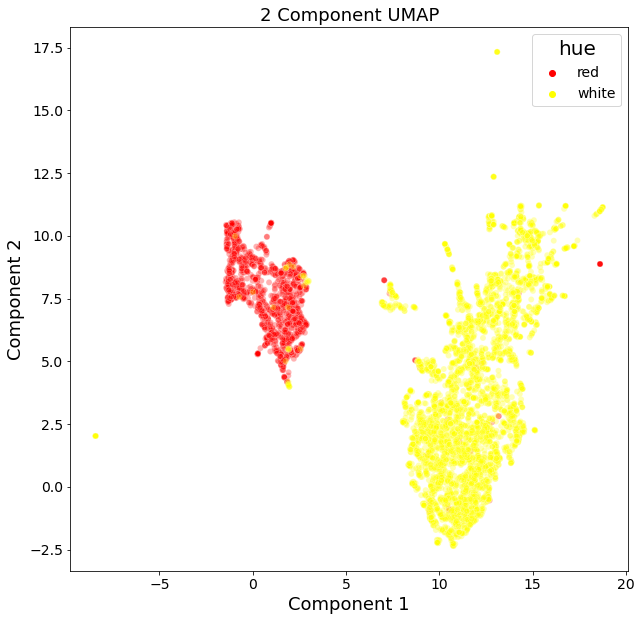

In [ ]:
umap_dataset = pd.DataFrame(data = umap_results, columns = ['component1', 'component2'] )
umap_dataset['hue']=df_wine['hue']
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component UMAP')
sns.scatterplot(x = umap_dataset['component1'], y = umap_dataset['component2'], hue = umap_dataset['hue'],
                alpha=0.3,palette=["red", "yellow"])

#Advanced plots
---

##Interactive Plot with Widgets

An interesting option is to make interactive graphics that allow us to explore the data. We will cover how different principal components (P.Cs) allow us to separate the data into different clusters. In this example, we calculate the first four principal components and set them in the axes of a 2D plot. As the P.C increases the separation between the red and the white wines increases.

In [ ]:
import ipywidgets as widgets
from IPython.display import display

data_pca = df_wine.copy()
data_pca = data_pca.drop(labels = ['quality','hue'],axis = 1)
data_pca = StandardScaler().fit_transform(data_pca)
pca = PCA(n_components=4)
pca_results = pca.fit_transform(data_pca)
columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4']
pca_dataset = pd.DataFrame(data = pca_results, columns = columns )
pca_dataset['hue']=df_wine['hue']

Xaxes =widgets.Dropdown(options=['principal component 1', 'principal component 2','principal component 3', 'principal component 4'],disabled=False)
Yaxes =widgets.Dropdown(options=['principal component 1', 'principal component 2','principal component 3', 'principal component 4'],disabled=False)

def PCvis(PC_X, PC_Y):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel(PC_X, fontsize = 15)
    ax.set_ylabel(PC_Y, fontsize = 15)
    ax.set_title('2 Component PCA', fontsize = 20)
    targets = ['red', 'white']
    colors = ['r', 'y']
    for target, color in zip(targets,colors):
        indicesToKeep = pca_dataset['hue'] == target
        ax.scatter(pca_dataset.loc[indicesToKeep, PC_X]
               , pca_dataset.loc[indicesToKeep, PC_Y]
               , c = color
               , alpha=0.3)
    ax.legend(targets)
    ax.grid()

widgets.interact(PCvis,PC_X=Xaxes,PC_Y=Yaxes)

interactive(children=(Dropdown(description='PC_X', options=('principal component 1', 'principal component 2', …

<function __main__.PCvis>

###3D Plots with Matplotlib

Another advanced plot that can be made is a 3D plot, in which we can see the relation beetween three diferent variables at the same time. In this case, we plot three PCA components. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:


The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:


The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning:


The `zmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning:


The `zmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.



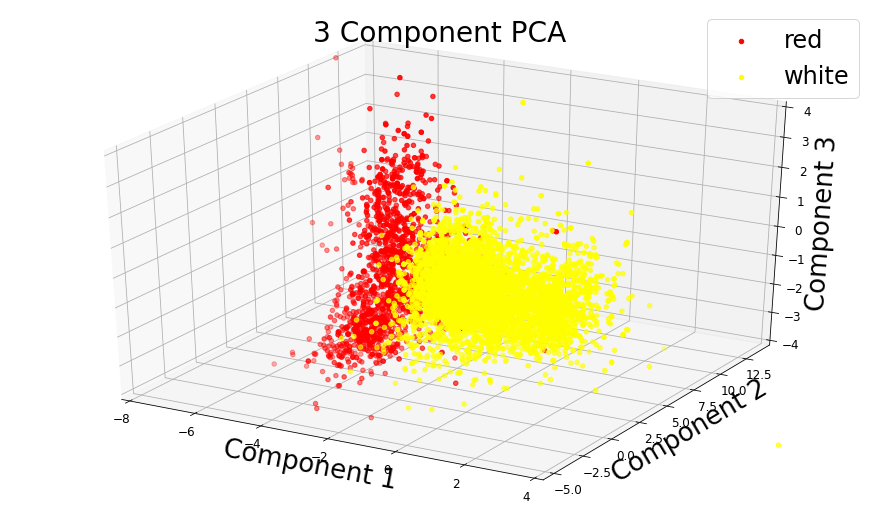

In [ ]:
data_pca = df_wine.copy()
data_pca = data_pca.drop(labels = ['quality','hue'],axis = 1)
data_pca = StandardScaler().fit_transform(data_pca)
pca = PCA(n_components=3)
pca_results = pca.fit_transform(data_pca)
columns = ['PC1', 'PC2','PC3']
pca_dataset = pd.DataFrame(data = pca_results, columns = columns )
pca_dataset['hue']=df_wine['hue']

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,7))
ax = Axes3D(fig)
ax.set_xlim(xmin=-8,xmax=4)
#ax.set_ylim(ymax=8)
ax.set_zlim(zmin=-4,zmax=4)
ax.set_xlabel('Component 1', fontsize = 26)
ax.set_ylabel('Component 2', fontsize = 26)
ax.set_zlabel('Component 3', fontsize = 26)
plt.title('3 Component PCA', fontsize = 28)

plt.rc('font', size=28)          # controls default text sizes
plt.rc('axes', titlesize=28)     # fontsize of the axes title
plt.rc('axes', labelsize=28)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=24)    # legend fontsize
plt.rc('figure', titlesize=28)  # fontsize of the figure title  

ax.scatter(pca_dataset[pca_dataset.hue == 'red'].PC1, pca_dataset[pca_dataset.hue == 'red'].PC2,
           pca_dataset[pca_dataset.hue == 'red'].PC3, c = ['red'], label='red', depthshade=True)
ax.scatter(pca_dataset[pca_dataset.hue == 'white'].PC1, pca_dataset[pca_dataset.hue == 'white'].PC2,
           pca_dataset[pca_dataset.hue == 'white'].PC3, c = ['yellow'], label='white', depthshade=True)
ax.legend()

##Interactive Plot with Plotly

Using Plotly we can make an interactive 3D plot for PCA, allowing to rotate and zoom into the data. For more information visit the [documentation](https://plotly.com/python/3d-scatter-plots/ " 3D Scatter Plots in Python").

In [ ]:
import datetime
from datetime import date
import pandas as pd
import numpy as np
from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 


cf.go_offline()

def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script 
  src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)
  

In [ ]:
#configure_plotly_browser_state()

trace_red = go.Scatter3d(
  x=pca_dataset[pca_dataset.hue == 'red'].PC1, y=pca_dataset[pca_dataset.hue == 'red'].PC2, z=pca_dataset[pca_dataset.hue == 'red'].PC3,
  mode = 'markers', marker = dict(
      size = 3,
      color = "red"
      ),
    opacity=0.5,
    name='red'
)
trace_white = go.Scatter3d(
  x=pca_dataset[pca_dataset.hue == 'white'].PC1, y=pca_dataset[pca_dataset.hue == 'white'].PC2, z=pca_dataset[pca_dataset.hue == 'white'].PC3,
  mode = 'markers', marker = dict(
      size = 2,
      color = "yellow"
      ),
    opacity=0.5,
    name='white'
)

layout = go.Layout(
        title_text='3 Component PCA',
        title_x=0.45,
        legend= {'itemsizing': 'constant'},
        margin=dict(l=0, r=0, b=0, t=50),
        scene = dict(
                     xaxis = dict(nticks=4, title='Component 1',),
                     yaxis = dict(nticks=4, title='Component 2',),
                     zaxis = dict(nticks=4, title='Component 3',)
                     )
        )

enable_plotly_in_cell()
fig = go.Figure(data = [trace_red, trace_white], layout = layout)
iplot(fig)
